# Лабораторная работа # 2. Гармоники

In [178]:
import numpy as np
import sys
import math

sys.path.append('../')
from thinkdsp import read_wave
from thinkdsp import SquareSignal, TriangleSignal, Signal, normalize, PI2

## Упражнение 2.2

Метод evaluate принимает массив времен, для которых нужно вернуть амплитуду сигнала. Переменная cycles служит для того, чтобы определить, сколько циклов проделал сигнал в момент времени ts. Строка *frac = cycles % 1* позволяет взять дробную часть этого значения, что означает, что сигнал будет падать в ноль в начале цикла и линейно возрастать на его протяжении.

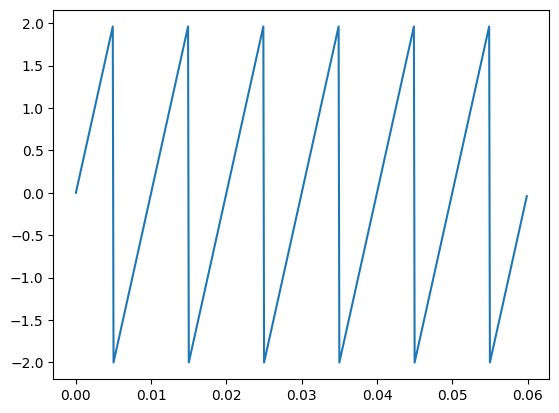

In [179]:
class SawtoothSignal(Signal):
    def __init__(self, freq=440, amp=1.0, offset=0):
        self.freq = freq
        self.amp = amp
        self.offset = offset

    @property
    def period(self):
        return 1 / self.freq

    def evaluate(self, ts):
        ts = np.array(ts)
        cycles = ts * self.freq + self.offset / PI2
        frac = cycles % 1

        ys = normalize(frac - 0.5, self.amp)
        return ys

sawtooth = SawtoothSignal(freq=100, offset=math.pi, amp=2)
swth_wave = sawtooth.make_wave(sawtooth.period * 6, framerate=10000)
swth_wave.plot()

Вычислим спектр пилообразного сигнала и сравним его со спектрами треугольного и прямоугольного сигнала

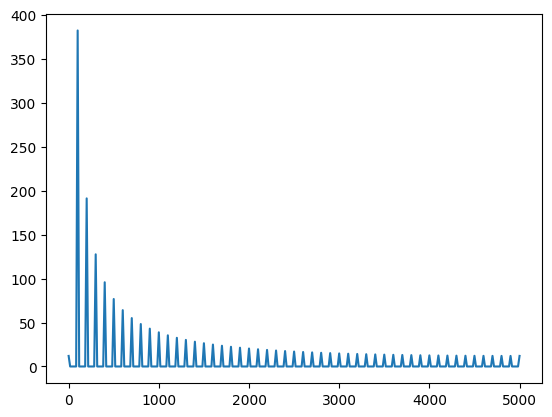

In [180]:
swth_wave.make_spectrum().plot()

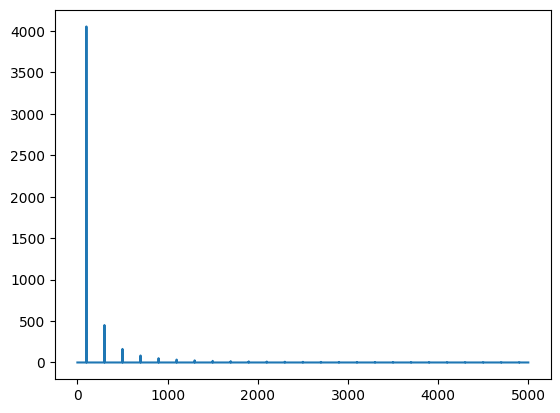

In [181]:
TriangleSignal(freq=100).make_wave(framerate=10000).make_spectrum().plot()

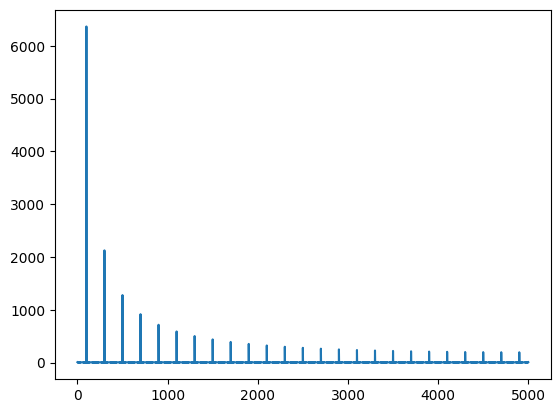

In [182]:
SquareSignal(freq=100).make_wave(framerate=10000).make_spectrum().plot()

Гармоники пилообразного сигнала, как и прямоугольного, падают пропорционально 1/f, однако в пилообразном сигнале так же присутствуют как четные, так и нечетные гармоники. Гармоники треугольного сигнала, в отличие от пилообразного и прямоугольного, падают пропорционально 1/f^2

## Упражнение 2.3

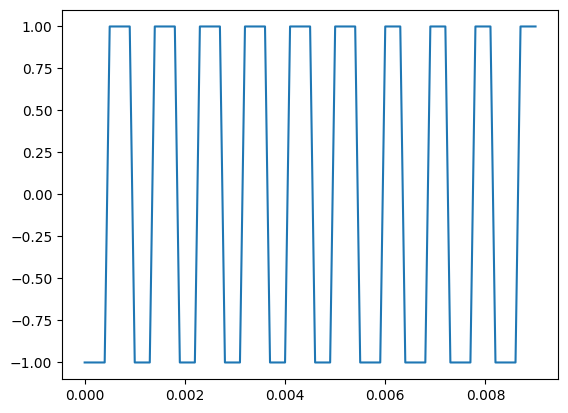

In [183]:
square = SquareSignal(1100)
sq_wave = square.make_wave(square.period * 10, framerate = 10000)
sq_wave.plot()

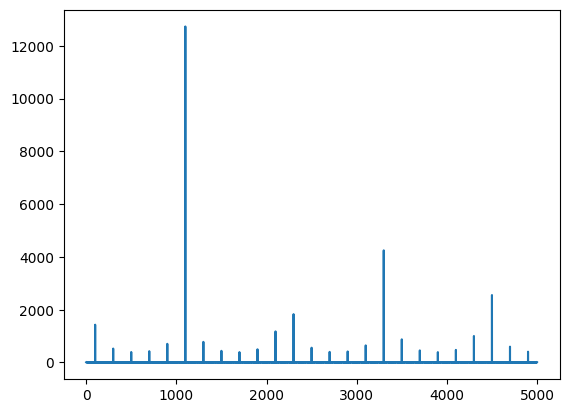

In [184]:
sound = square.make_wave(2, framerate=10000)
spectrum = sound.make_spectrum()
spectrum.plot()
sound.make_audio()


Как видно из спектра, большая часть гармоник были завернуты, из-за этого при прослушивании слышится биение

## Упражнение 2.4

In [185]:
spectrum.fs[:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Чтобы убедится, что spectrum.fs[0] -- это амплитуда компоненты с частотой 0 проведем такой эксперимент:

1. Создадим треугольный сигнал с частотой 440 Гц и длительностью 0.01 секунды
2. Создадим объект **Spectrum** и распечатаем **Spectrum.hs[0]**
3. Установим Spectrum.hs[0] = 100

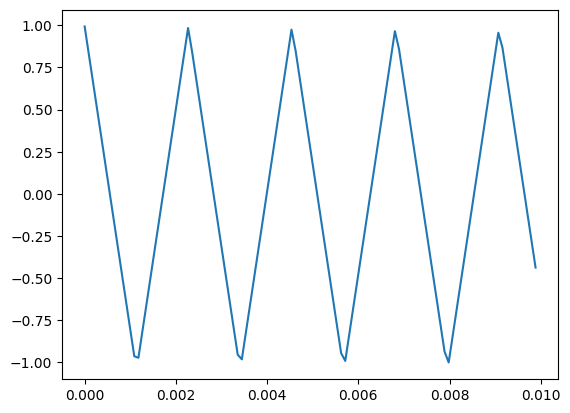

In [186]:
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

In [187]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

**spectrum.hs[0]** -- это комплексное число, где амплитуде пропорционален модуль этого числа, а угол числа -- это фаза сигнала. В данном случае амплитуда близка к нулю, и фаза равна нулю, так как мнимая компонента равна нулю.

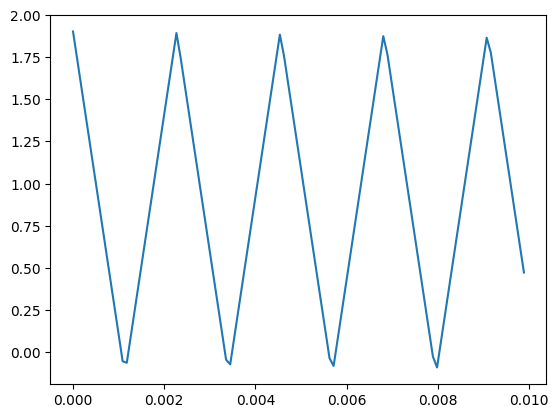

In [188]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

Мы видим, что график сместился вверх на единицу. Таким образом, нулевая частота -- это прямая линия, которая обеспечивает сдвиг относительно оси y на константное число

## Упражнение 2.5

Напишем функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответствующую частоту из fs.

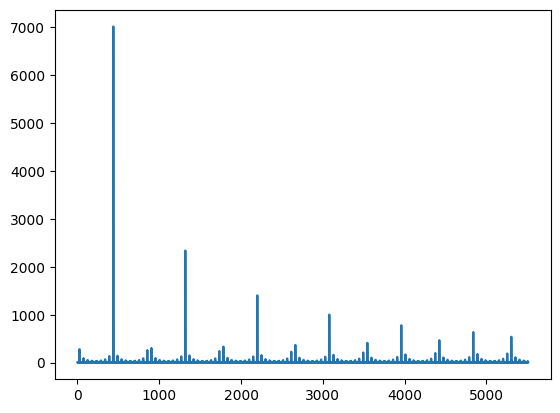

In [189]:
def filter_spectrum(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

square_sig = SquareSignal(freq=440).make_wave(duration=1)
triangle_sig = TriangleSignal(freq=440).make_wave(duration=1)
sawtooth_sig = SawtoothSignal(freq=440).make_wave(duration=1)

square_spec = square_sig.make_spectrum()
triangle_spec = triangle_sig.make_spectrum()
sawtooth_spec = sawtooth_sig.make_spectrum()

square_spec.plot()
square_sig.make_audio()

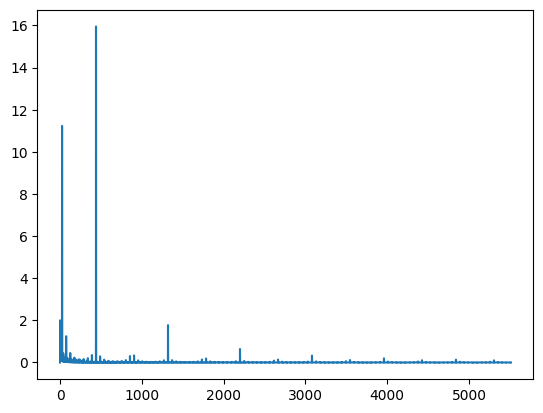

In [190]:
filter_spectrum(square_spec)
square_spec.plot()
square_spec.make_wave().make_audio()

Функция *filter_spectrum* действует как фильтр низких частот. Отфильтрованный звук звучит приглушённо.

## Упражнение 2.6

Чтобы получить требуемый сигнал, создадим пилообразный сигнал и применим к нему функцию, написанную в прошлом упражнении.

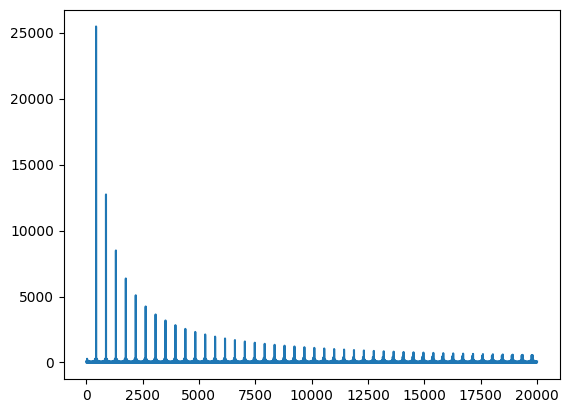

In [191]:
saw = SawtoothSignal(440)
saw_wave = saw.make_wave(duration=2, framerate=40000)
saw_spec = saw_wave.make_spectrum()
saw_spec.plot()

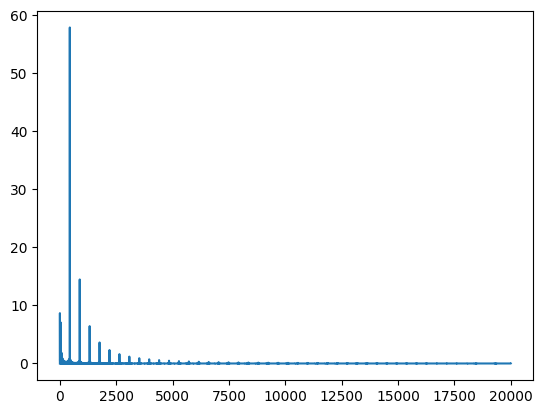

In [192]:
filter_spectrum(saw_spec)
saw_spec.plot()
saw_spec.make_wave().make_audio()

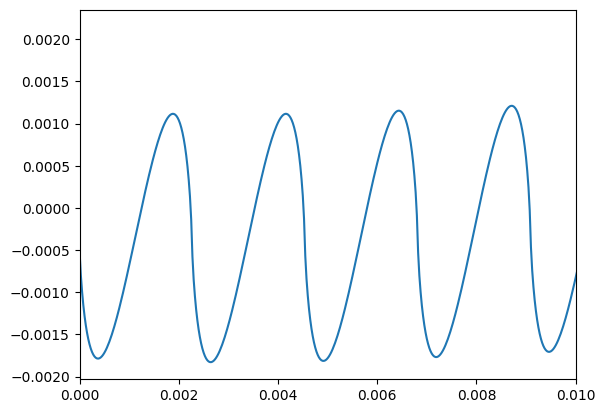

In [193]:
from matplotlib import pyplot as plt

plt.xlim(0,0.01)
saw_spec.make_wave().plot()